Computer problems:

* The computer fan has been having more problems. (need to try dusting it off?)

Camera problems:

* There is possibly something covering the camera. Beginning in June. The day videos are still (probably) usable; the night videos are not.
* The camera has moved. Beginning in June. May need to be recalibrated.

Observations from dataset:

* Snowy conditions lead to inaccurate data
* So far, have not seen correlation between time of day and outcomes
* Clear skies tend to lead to the best results
* Some of the January videos have "upsteam vectors" due to snow; some of the May videos have legitimate upstream vectors due to current
* time series analysis; not seeing any strong trends over time other than vectors longer when river higher (as expected)
* Have looked at:
  * Proportion of upsteam : downstream : NaN vectors
  * vectors lengths
* Could try:
  * Setting a threshold on length (only look at vectors > 0.15)
  * Looking at vector counts per video


TODO:

* Figure out when camera moved
* Look at times of day and how many vectors in each spacial location
* Look at time of day per day
* Look at TurbAvg and TurbMed from LRO data
* Look at varability of vector direction based on vector length

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UWRL_river_velocimetry_dataset.csv')

In [3]:
df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'vegetation', 'visibility', 'cloudcover',
       'solarradiation', 'uvindex', 'conditions', 'v_pos'],
      dtype='object')


,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,spacial_location,LRO_discharge,LRO_discharge_site,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,v_pos
0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,4,5.95,MainStreet,none,9.9,0.0,942,9,Clear,0
1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,4,5.95,MainStreet,none,9.9,0.0,942,9,Clear,0
2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,4,5.95,MainStreet,none,9.9,0.0,942,9,Clear,0
3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,4,5.95,MainStreet,none,9.9,0.0,942,9,Clear,0
4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,4,5.95,MainStreet,none,9.9,0.0,942,9,Clear,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,0.414650,3.444309,0,3.20,MainStreet,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1
9299132,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,0.414650,3.444309,0,3.20,MainStreet,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-1
9299133,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,0.414650,3.444309,0,3.20,MainStreet,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1
9299134,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,0.414650,3.444309,0,3.20,MainStreet,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-1


<Axes: xlabel='conditions', ylabel='Count'>

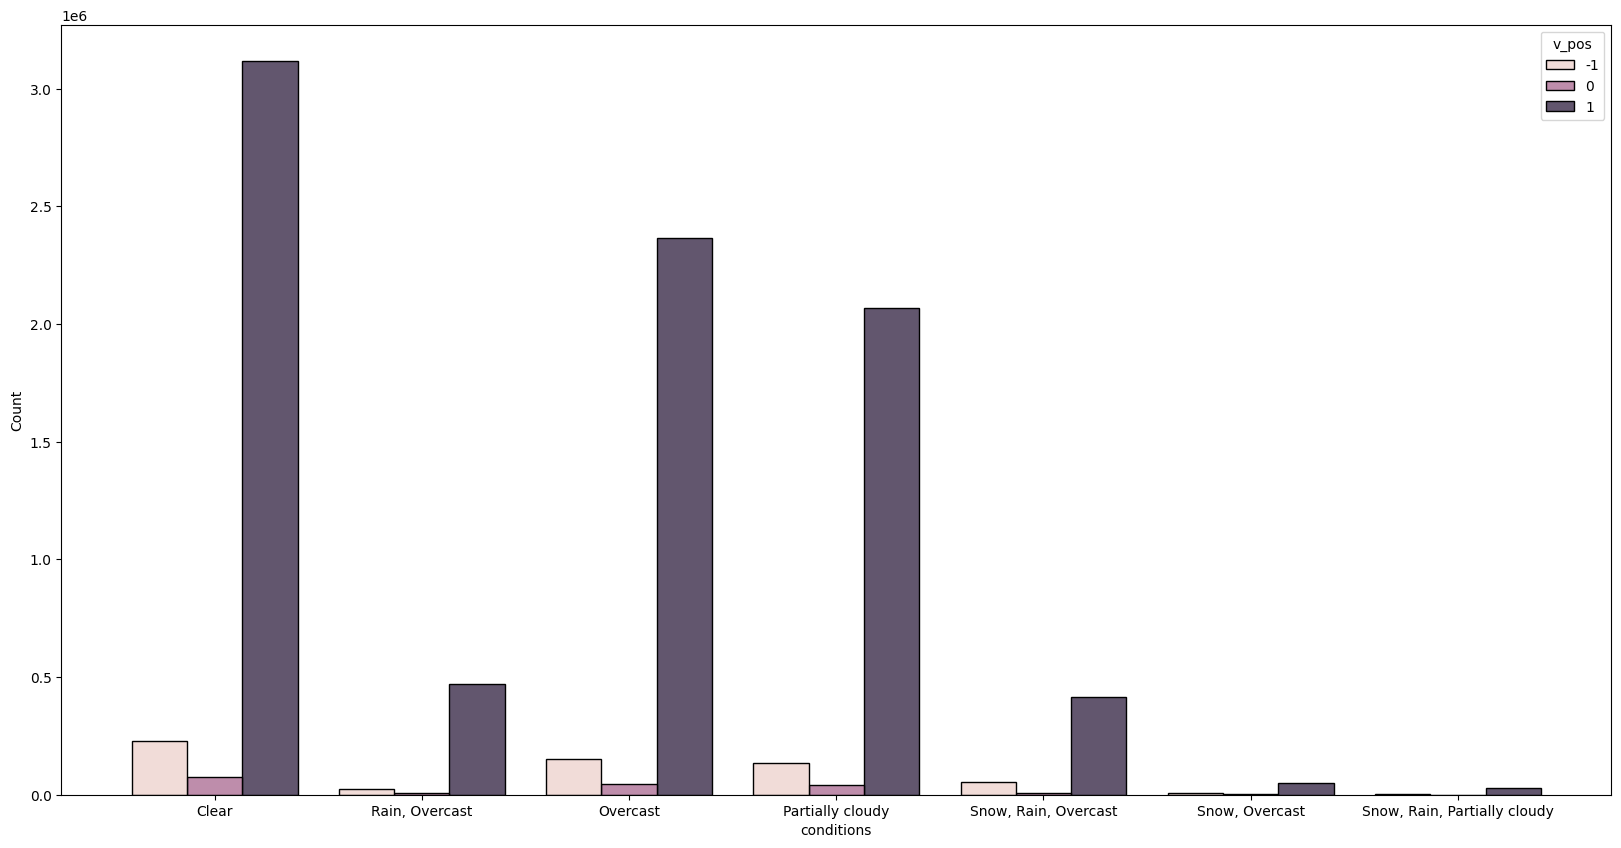

In [4]:
plt.figure(figsize=(20, 10))

sns.histplot(
    data=df,
    x='conditions',
    hue='v_pos',
    discrete=True,
    multiple='dodge',
    shrink=0.8
)

In [5]:
for condition in df.conditions.unique():
    df_temp = df[df.conditions == condition]
    print(condition)
    print(f'     negative: {len(df_temp[df_temp.v_pos == -1]) / len(df_temp):.2%}')
    print(f'          nan: {len(df_temp[df_temp.v_pos ==  0]) / len(df_temp):.2%}')
    print(f'  nonnegative: {len(df_temp[df_temp.v_pos ==  1]) / len(df_temp):.2%}')

Clear
     negative: 6.70%
          nan: 2.14%
  nonnegative: 91.16%
Rain, Overcast
     negative: 4.65%
          nan: 1.82%
  nonnegative: 93.54%
Overcast
     negative: 5.94%
          nan: 1.82%
  nonnegative: 92.24%
Partially cloudy
     negative: 5.99%
          nan: 1.82%
  nonnegative: 92.19%
Snow, Rain, Overcast
     negative: 11.15%
          nan: 1.82%
  nonnegative: 87.02%
Snow, Overcast
     negative: 12.24%
          nan: 1.82%
  nonnegative: 85.95%
Snow, Rain, Partially cloudy
     negative: 8.51%
          nan: 1.82%
  nonnegative: 89.67%


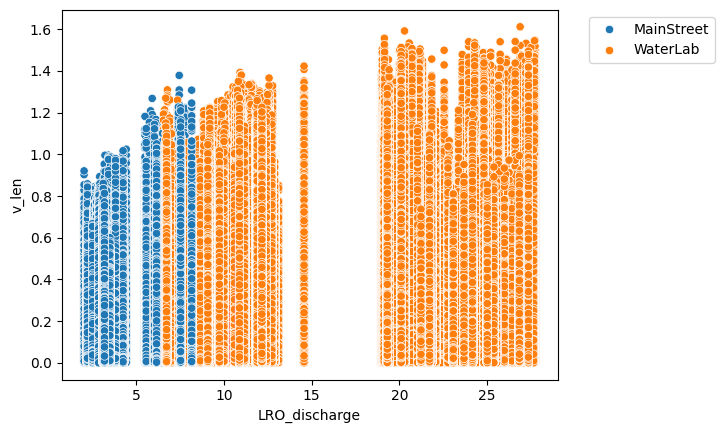

In [7]:
sns.scatterplot(
    data=df,
    x='LRO_discharge',
    y='v_len',
    hue='LRO_discharge_site'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Axes: xlabel='v_len', ylabel='Count'>

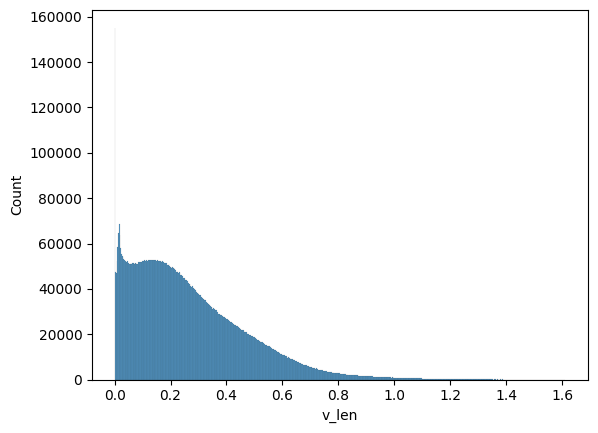

In [8]:
sns.histplot(
    data=df,
    x='v_len'
)